## Master of Econoimics, specila project code
For this piece of code, the goal is to clean and extract the data that lighten the load in R
It is more the route we play with the data rather than a piece of automated software

### examine the personal data
The goal of this part is understand the data since there were more than 100s of variable on some of the data, and later we acutually give up this rout due to small data size

In [162]:
import pandas as pd
df = pd.read_csv(r'/home/yui/Downloads/cps_00004.csv')
#Pirnt number of missing data, just to get a feel of the data
print(df.notnull().sum())
# Sort by 'Year'
df = df.sort_values('YEAR')

# Group by 'CPSID' and take the first non-NaN value for each other column,since we only need one observation per year
#Since we only need one observation per year, a observation in the raw data is usually differernt column have different variable missing
df = df.groupby(['CPSID','YEAR']).first().reset_index()

print(df['COUNTY'])

YEAR         438111
SERIAL       438111
MONTH        438111
HWTFINL      232097
CPSID        438111
ASECFLAG     227291
HFLAG         16359
ASECWTH      206014
METRO        438111
METAREA      370665
COUNTY       438111
METFIPS      438111
INDIVIDCC    438111
HEATSUB      206014
PERNUM       438111
WTFINL       232097
CPSIDV       438111
CPSIDP       438111
ASECWT       206014
RELATE       438111
AGE          438111
SEX          438111
RACE         438111
QAGE         438111
QRELATE      438111
QSEX         438111
QRACE        438111
EDUC99       438111
SCHLCOLL     438111
QSCHCOL1     438111
QSCHCOL2     438111
QSCHCOL3     438111
FTOTVAL      206014
INCWELFR     206014
INCEDUC      206014
HIMCAIDNW     60844
CAIDNW        60844
EDATT          7287
EDATTLY        7287
EDGRADE        7287
EDGRDLY        7287
EDFULL         7287
EDTYPE         7287
dtype: int64
0             0
1             0
2             0
3             0
4          6001
          ...  
151930    24031
151931        0

The variable with null showcase the number of missing varaible by column, here is wasn't too bad 

### Step 2, filter the data
since we only need 3 year of datam keep them only

In [163]:
df = df[df['YEAR'].isin([2012, 2016, 2020])] #keep only what we need

### examine the election data
The issue is the data is in R file so we need some more work to extract it

In [172]:
# Read the Rdata file
import pyreadr
#load the election data
result = pyreadr.read_r(r'/home/yui/Downloads/dataverse_shareable_presidential_county_returns_1868_2020.Rdata')

dataframe_name = list(result.keys())[1]  # replace 'dataframe_name' with the actual name of the dataframe in R 
df2 = result[dataframe_name]

# Show the DataFrame
print(df2.head())

   election_year   fips county_name state sfips office election_type  \
0         1868.0  01001     AUTAUGA    AL    01   PRES             G   
1         1872.0  01001     AUTAUGA    AL    01   PRES             G   
2         1876.0  01001     AUTAUGA    AL    01   PRES             G   
3         1880.0  01001     AUTAUGA    AL    01   PRES             G   
4         1884.0  01001     AUTAUGA    AL    01   PRES             G   

                        seat_status  democratic_raw_votes  \
0                         Open Seat                 851.0   
1  Republican President Re-election                 669.0   
2                         Open Seat                 804.0   
3                         Open Seat                 978.0   
4                         Open Seat                 911.0   

              dem_nominee  republican_raw_votes          rep_nominee  \
0         Horatio Seymour                1505.0     Ulysses S. Grant   
1          Horace Greeley                1593.0     Ulys

### Merge
Then we change the type and make sure it can join other data set
One common issue with merging is FIPS due to leading zero

In [173]:
# Convert COUNTY and fips columns to strings
#Prepare them to join and remove unused part of the value to avoid problem with merge
df2['fips'] = df2['fips'].astype(str)

# Keep only the part before the dash for both columns

df2['fips'] = df2['fips'].str.split('-').str[0]

# Truncate to the first 5 characters if length > 5
df2['fips'] = df2['fips'].str.slice(0, 5)

# Convert 'COUNTY' and 'YEAR' to string
df['COUNTY'] = df['COUNTY'].astype(str)
df['YEAR'] = df['YEAR'].astype(str)
df['YEAR'] = df['YEAR'].str.split('.').str[0]
df['COUNTY'] = df['COUNTY'].str.zfill(5)

# Convert 'fips' and 'election_year' to string
df2['fips'] = df2['fips'].astype(str)
df2['election_year'] = df2['election_year'].astype(str)
df2['election_year'] = df2['election_year'].str.split('.').str[0]
# Now try the merge again
merged_df = pd.merge(df, df2, left_on=['COUNTY','YEAR'], right_on=['fips','election_year'], how='left', indicator=True)

# Show the resulting DataFrame with matching situation
print("Merged DataFrame with matching situation:")
print(merged_df.columns)


Merged DataFrame with matching situation:
Index(['CPSID', 'YEAR', 'SERIAL', 'MONTH', 'HWTFINL', 'ASECFLAG', 'HFLAG',
       'ASECWTH', 'METRO', 'METAREA', 'COUNTY', 'METFIPS', 'INDIVIDCC',
       'HEATSUB', 'PERNUM', 'WTFINL', 'CPSIDV', 'CPSIDP', 'ASECWT', 'RELATE',
       'AGE', 'SEX', 'RACE', 'QAGE', 'QRELATE', 'QSEX', 'QRACE', 'EDUC99',
       'SCHLCOLL', 'QSCHCOL1', 'QSCHCOL2', 'QSCHCOL3', 'FTOTVAL', 'INCWELFR',
       'INCEDUC', 'HIMCAIDNW', 'CAIDNW', 'EDATT', 'EDATTLY', 'EDGRADE',
       'EDGRDLY', 'EDFULL', 'EDTYPE', 'election_year', 'fips', 'county_name',
       'state', 'sfips', 'office', 'election_type', 'seat_status',
       'democratic_raw_votes', 'dem_nominee', 'republican_raw_votes',
       'rep_nominee', 'pres_raw_county_vote_totals_two_party',
       'raw_county_vote_totals', 'county_first_date', 'county_end_date',
       'state_admission_date', 'complete_county_cases', 'original_county_name',
       'original_name_end_date', '_merge'],
      dtype='object')


Check the qulity of merge

In [174]:
# Count the number of occurrences of each unique value in the 'Fruit' column
_merge_counts =merged_df['_merge'].value_counts()

# Print the counts, it is normal to have hight left only value since the political data we used only cover main city
print("Number of observations for each unique value in '_merge ':")
print(_merge_counts)

Number of observations for each unique value in '_merge ':
left_only     12479
both           8769
right_only        0
Name: _merge, dtype: int64


In [175]:
print(merged_df['COUNTY'].unique()) #check does data have the main city

array(['00000', '10001', '10003', '11001', '12103', '26049', '26161',
       '34001', '34017', '34021', '34027', '34029', '36047', '36055',
       '36059', '36081', '39035', '51059', '04003', '04013', '04019',
       '05119', '06001', '06037', '06059', '06067', '06071', '06111',
       '08035', '32003', '48061', '48381', '15001', '01097', '12057',
       '12127', '24017', '24043', '26115', '26125', '26139', '34013',
       '34037', '36005', '36103', '42101', '10005', '06029', '06039',
       '06047', '06061', '06065', '06073', '06077', '06095', '08031',
       '17111', '18089', '22019', '22103', '27123', '53033', '15003',
       '19113', '01073', '01117', '26099', '26147', '26163', '34003',
       '37119', '39045', '42003', '42049', '42129', '51087', '04025',
       '06019', '08069', '08123', '17099', '18095', '22051', '29189',
       '38017', '41029', '48029', '48141', '48309', '53063', '19153',
       '41043', '12086', '12099', '23011', '26005', '36085', '42017',
       '42029', '450

In [171]:
merged_df.to_csv('out.csv') # save a copy for analyze 

We actully output the last df for future investagation but we abandon that route due to such a small population data we have

## Merging college level data with county level data
### First load college level data

In [7]:
import pandas as pd
df = pd.read_csv(r'/home/yui/CollegeScorecard_Raw_Data_04192023 (1)/data/MERGED2020_21_PP.csv')
#load the college level data
print(df.columns)

/tmp/ipykernel_1771318/1642441149.py:2: DtypeWarning: Columns (1489,1537,1540,1542,1561,1575,1606,1614,1615,1729,1909,1910,1911,1912,1913) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'/home/yui/CollegeScorecard_Raw_Data_04192023 (1)/data/MERGED2012_13_PP.csv')


Index(['UNITID', 'OPEID', 'OPEID6', 'INSTNM', 'CITY', 'STABBR', 'ZIP',
       'ACCREDAGENCY', 'INSTURL', 'NPCURL',
       ...
       'BBRR4_PP_MALE_DISCHARGE', 'BBRR4_PP_NOMALE_N', 'BBRR4_PP_NOMALE_DFLT',
       'BBRR4_PP_NOMALE_DLNQ', 'BBRR4_PP_NOMALE_FBR', 'BBRR4_PP_NOMALE_DFR',
       'BBRR4_PP_NOMALE_NOPROG', 'BBRR4_PP_NOMALE_MAKEPROG',
       'BBRR4_PP_NOMALE_PAIDINFULL', 'BBRR4_PP_NOMALE_DISCHARGE'],
      dtype='object', length=3214)


In [8]:
from pprint import pprint
# arr is the numpy ndarray, since their is too much column, I have to use another way to print all the column
pprint(df.columns.tolist())

['UNITID',
 'OPEID',
 'OPEID6',
 'INSTNM',
 'CITY',
 'STABBR',
 'ZIP',
 'ACCREDAGENCY',
 'INSTURL',
 'NPCURL',
 'SCH_DEG',
 'HCM2',
 'MAIN',
 'NUMBRANCH',
 'PREDDEG',
 'HIGHDEG',
 'CONTROL',
 'ST_FIPS',
 'REGION',
 'LOCALE',
 'LOCALE2',
 'LATITUDE',
 'LONGITUDE',
 'CCBASIC',
 'CCUGPROF',
 'CCSIZSET',
 'HBCU',
 'PBI',
 'ANNHI',
 'TRIBAL',
 'AANAPII',
 'HSI',
 'NANTI',
 'MENONLY',
 'WOMENONLY',
 'RELAFFIL',
 'ADM_RATE',
 'ADM_RATE_ALL',
 'SATVR25',
 'SATVR75',
 'SATMT25',
 'SATMT75',
 'SATWR25',
 'SATWR75',
 'SATVRMID',
 'SATMTMID',
 'SATWRMID',
 'ACTCM25',
 'ACTCM75',
 'ACTEN25',
 'ACTEN75',
 'ACTMT25',
 'ACTMT75',
 'ACTWR25',
 'ACTWR75',
 'ACTCMMID',
 'ACTENMID',
 'ACTMTMID',
 'ACTWRMID',
 'SAT_AVG',
 'SAT_AVG_ALL',
 'PCIP01',
 'PCIP03',
 'PCIP04',
 'PCIP05',
 'PCIP09',
 'PCIP10',
 'PCIP11',
 'PCIP12',
 'PCIP13',
 'PCIP14',
 'PCIP15',
 'PCIP16',
 'PCIP19',
 'PCIP22',
 'PCIP23',
 'PCIP24',
 'PCIP25',
 'PCIP26',
 'PCIP27',
 'PCIP29',
 'PCIP30',
 'PCIP31',
 'PCIP38',
 'PCIP39',
 'PCIP40',

In [9]:
# Select only the desired columns to save spave
df = df[['INSTNM','UNITID', 'ZIP', 'ADM_RATE', 'ADM_RATE_ALL', 'SATVRMID', 'SATMTMID', 'SATWRMID', 'ACTCMMID', 'ACTENMID', 'ACTMTMID', 'ACTWRMID', 'SAT_AVG', 'SAT_AVG_ALL', 'TUITIONFEE_IN', 'TUITIONFEE_OUT', 'TUITIONFEE_PROG', 'MENONLY', 'WOMENONLY', 'RELAFFIL', 'SCH_DEG', 'DISTANCEONLY', 'UGDS', 'UG', 'UGDS_WHITE', 'UGDS_BLACK', 'UGDS_HISP', 'UGDS_ASIAN', 'UGDS_AIAN', 'UGDS_NHPI', 'UGDS_2MOR', 'UGDS_NRA', 'UGDS_UNKN', 'UGDS_WHITENH', 'UGDS_BLACKNH', 'UGDS_API', 'UGDS_AIANOLD', 'UGDS_HISPOLD','PREDDEG','HIGHDEG','LOCALE2']]

### Check the bumber of observation

Print all the non null column, a common issue of goverment data was they have a column doesn't mean it is populated with data, we need to check is it really usable
every observation is a school here

In [10]:
df.notnull().sum() #check for null

INSTNM             7862
UNITID             7862
ZIP                7862
ADM_RATE           2327
ADM_RATE_ALL       2657
SATVRMID           1308
SATMTMID           1323
SATWRMID            784
ACTCMMID           1336
ACTENMID           1153
ACTMTMID           1152
ACTWRMID            271
SAT_AVG            1437
SAT_AVG_ALL        1551
TUITIONFEE_IN      4462
TUITIONFEE_OUT     4277
TUITIONFEE_PROG    2726
MENONLY               0
WOMENONLY             0
RELAFFIL              0
SCH_DEG            7749
DISTANCEONLY       7474
UGDS               7139
UG                    0
UGDS_WHITE         7139
UGDS_BLACK         7139
UGDS_HISP          7139
UGDS_ASIAN         7139
UGDS_AIAN          7139
UGDS_NHPI          7139
UGDS_2MOR          7139
UGDS_NRA           7139
UGDS_UNKN          7139
UGDS_WHITENH          0
UGDS_BLACKNH          0
UGDS_API              0
UGDS_AIANOLD          0
UGDS_HISPOLD          0
PREDDEG            7862
HIGHDEG            7862
LOCALE2               0
dtype: int64

### Zip to county
So for the school level data, a original thought was to use the school level data's latitude and longtiude to figure out where that school was, but it was missing, so we use another dataset that join Zip code to county here

and it also contrain data about how much of that coundy is residental and how much is other which is alos useful for us.

In [11]:
# Specify the path to the Excel file, since we don't have county code on college level data, we use a mapping data from HUD
file_path = '/home/yui/Downloads/ZIP_COUNTY_032020.xlsx'

# Read the Excel file into a DataFrame
df2 = pd.read_excel(file_path)

# Show the first few rows of the DataFrame to verify it was loaded correctly
print(df2.head())

   ZIP  COUNTY  RES_RATIO  BUS_RATIO  OTH_RATIO  TOT_RATIO
0  501   36103   0.000000    1.00000   0.000000   1.000000
1  601   72113   0.160724    0.20098   0.128834   0.162500
2  601   72001   0.839276    0.79902   0.871166   0.837500
3  602   72003   1.000000    0.99880   1.000000   0.999919
4  602   72005   0.000000    0.00120   0.000000   0.000081


#### Clean both sid efor joining
Some data set contrain sub zip code, we don't care about those so we make sure they are drop and zfill to 5 to make ssure there are always length of five we leading zero.

In [12]:
# Convert ZIP columns to strings
df['ZIP'] = df['ZIP'].astype(str)
df2['ZIP'] = df2['ZIP'].astype(str)
# Keep only the part before the dash
df['ZIP'] = df['ZIP'].str.split('-').str[0]
df2['ZIP'] = df2['ZIP'].str.split('-').str[0]
df['ZIP'] = df['ZIP'].str.slice(0, 5)
df2['ZIP'] = df2['ZIP'].str.slice(0, 5)
# Fill ZIP codes with leading zeros to make them 5-digit strings
df['ZIP'] = df['ZIP'].str.zfill(5)
df2['ZIP'] = df2['ZIP'].str.zfill(5)


In [13]:
# Perform the left join, and add an indicator column '_merge'
merged_df = pd.merge(df, df2, on='ZIP', how='left', indicator=True)

# Show the resulting DataFrame with matching situation
print("Merged DataFrame with matching situation:")
print(merged_df.columns)

Merged DataFrame with matching situation:
Index(['INSTNM', 'UNITID', 'ZIP', 'ADM_RATE', 'ADM_RATE_ALL', 'SATVRMID',
       'SATMTMID', 'SATWRMID', 'ACTCMMID', 'ACTENMID', 'ACTMTMID', 'ACTWRMID',
       'SAT_AVG', 'SAT_AVG_ALL', 'TUITIONFEE_IN', 'TUITIONFEE_OUT',
       'TUITIONFEE_PROG', 'MENONLY', 'WOMENONLY', 'RELAFFIL', 'SCH_DEG',
       'DISTANCEONLY', 'UGDS', 'UG', 'UGDS_WHITE', 'UGDS_BLACK', 'UGDS_HISP',
       'UGDS_ASIAN', 'UGDS_AIAN', 'UGDS_NHPI', 'UGDS_2MOR', 'UGDS_NRA',
       'UGDS_UNKN', 'UGDS_WHITENH', 'UGDS_BLACKNH', 'UGDS_API', 'UGDS_AIANOLD',
       'UGDS_HISPOLD', 'PREDDEG', 'HIGHDEG', 'LOCALE2', 'COUNTY', 'RES_RATIO',
       'BUS_RATIO', 'OTH_RATIO', 'TOT_RATIO', '_merge'],
      dtype='object')


#### Check quality of the merge
me lost minium merge,the one fail are the one with missing zips code 

In [14]:
# Count the number of occurrences of each unique value in the 'Fruit' column
_merge_counts =merged_df['_merge'].value_counts()

# Print the counts for checking
print("Number of observations for each unique value in '_merge ':")
print(_merge_counts)
merged_df.drop('_merge', axis=1, inplace=True)


Number of observations for each unique value in '_merge ':
_merge
both          10287
left_only        31
right_only        0
Name: count, dtype: int64


#### Save the file to use in R.

In [15]:
merged_df.to_csv('2021.csv') # we call it 2021 since we have to used 2021 in out study but 2021 only have data in college score board

### now, we merge the dataset to the election data
Read in the R file, we keep only the year we need for the data

In [17]:
for cyear in [2012,2016,2020]:
    import pyreadr
    import pandas as pd
    result = pyreadr.read_r(r'/home/yui/Downloads/dataverse_shareable_presidential_county_returns_1868_2020.Rdata')
    #print(result)
    # The result is a dictionary where keys are the name of R objects and the values pandas dataframes
    # Assuming the name of the object in R is 'dataframe_name'
    dataframe_name = list(result.keys())[1]  # replace 'dataframe_name' with the actual name of the dataframe in R if known
    df = result[dataframe_name]

    # Show the DataFrame
    print(df.head())

    df=df[df['election_year']==cyear]
    # Convert COUNTY and fips columns to strings
    merged_df['COUNTY'] = merged_df['COUNTY'].astype(str)
    df['fips'] = df['fips'].astype(str)

    # Keep only the part before the dash for both columns
    merged_df['COUNTY'] = merged_df['COUNTY'].str.split('-').str[0]
    df['fips'] = df['fips'].str.split('-').str[0]

    # Truncate to the first 5 characters if length > 5

    merged_df['COUNTY'] = merged_df['COUNTY'].str.slice(0, 5)
    merged_df['COUNTY'] = merged_df['COUNTY'].str.replace('.', '', regex=False)
    merged_df['COUNTY']= merged_df['COUNTY'].str.zfill(5)
    df['fips'] = df['fips'].str.slice(0, 5)
    df['fips'] = df['fips'].str.zfill(5)
    print(merged_df['COUNTY'].unique())
    print(df['fips'].unique())
    # Perform the left join, and add an indicator column '_merge'
    merged_df = pd.merge(merged_df, df, left_on='COUNTY',right_on='fips', how='left', indicator=True)

    # Show the resulting DataFrame with matching situation
    print("Merged DataFrame with matching situation:")
    print(merged_df.columns)
    # Count the number of occurrences of each unique value in the 'Fruit' column
    _merge_counts =merged_df['_merge'].value_counts()

    # Print the counts
    print("Number of observations for each unique value in '_merge ':")
    print(_merge_counts)
    merged_df.drop('_merge', axis=1, inplace=True)
    pprint(merged_df.notnull().sum())
    merged_df.to_csv(f'{cyear}.csv')

/home/yui/anaconda3/lib/python3.9/site-packages/pyreadr/_pyreadr_parser.py:233: RuntimeWarning: invalid value encountered in cast
  df[colname] = df[colname].values.astype("datetime64[D]").astype(datetime)
/tmp/ipykernel_1771318/4246129787.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fips'] = df['fips'].astype(str)
/tmp/ipykernel_1771318/4246129787.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fips'] = df['fips'].str.split('-').str[0]
/tmp/ipykernel_1771318/4246129787.py:28: SettingWi

   election_year   fips county_name state sfips office election_type  \
0         1868.0  01001     AUTAUGA    AL    01   PRES             G   
1         1872.0  01001     AUTAUGA    AL    01   PRES             G   
2         1876.0  01001     AUTAUGA    AL    01   PRES             G   
3         1880.0  01001     AUTAUGA    AL    01   PRES             G   
4         1884.0  01001     AUTAUGA    AL    01   PRES             G   

                        seat_status  democratic_raw_votes  \
0                         Open Seat                 851.0   
1  Republican President Re-election                 669.0   
2                         Open Seat                 804.0   
3                         Open Seat                 978.0   
4                         Open Seat                 911.0   

              dem_nominee  republican_raw_votes          rep_nominee  \
0         Horatio Seymour                1505.0     Ulysses S. Grant   
1          Horace Greeley                1593.0     Ulys

/home/yui/anaconda3/lib/python3.9/site-packages/pyreadr/_pyreadr_parser.py:233: RuntimeWarning: invalid value encountered in cast
  df[colname] = df[colname].values.astype("datetime64[D]").astype(datetime)
/tmp/ipykernel_1771318/4246129787.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fips'] = df['fips'].astype(str)
/tmp/ipykernel_1771318/4246129787.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fips'] = df['fips'].str.split('-').str[0]
/tmp/ipykernel_1771318/4246129787.py:28: SettingWi

   election_year   fips county_name state sfips office election_type  \
0         1868.0  01001     AUTAUGA    AL    01   PRES             G   
1         1872.0  01001     AUTAUGA    AL    01   PRES             G   
2         1876.0  01001     AUTAUGA    AL    01   PRES             G   
3         1880.0  01001     AUTAUGA    AL    01   PRES             G   
4         1884.0  01001     AUTAUGA    AL    01   PRES             G   

                        seat_status  democratic_raw_votes  \
0                         Open Seat                 851.0   
1  Republican President Re-election                 669.0   
2                         Open Seat                 804.0   
3                         Open Seat                 978.0   
4                         Open Seat                 911.0   

              dem_nominee  republican_raw_votes          rep_nominee  \
0         Horatio Seymour                1505.0     Ulysses S. Grant   
1          Horace Greeley                1593.0     Ulys

/home/yui/anaconda3/lib/python3.9/site-packages/pyreadr/_pyreadr_parser.py:233: RuntimeWarning: invalid value encountered in cast
  df[colname] = df[colname].values.astype("datetime64[D]").astype(datetime)
/tmp/ipykernel_1771318/4246129787.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fips'] = df['fips'].astype(str)
/tmp/ipykernel_1771318/4246129787.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fips'] = df['fips'].str.split('-').str[0]
/tmp/ipykernel_1771318/4246129787.py:28: SettingWi

   election_year   fips county_name state sfips office election_type  \
0         1868.0  01001     AUTAUGA    AL    01   PRES             G   
1         1872.0  01001     AUTAUGA    AL    01   PRES             G   
2         1876.0  01001     AUTAUGA    AL    01   PRES             G   
3         1880.0  01001     AUTAUGA    AL    01   PRES             G   
4         1884.0  01001     AUTAUGA    AL    01   PRES             G   

                        seat_status  democratic_raw_votes  \
0                         Open Seat                 851.0   
1  Republican President Re-election                 669.0   
2                         Open Seat                 804.0   
3                         Open Seat                 978.0   
4                         Open Seat                 911.0   

              dem_nominee  republican_raw_votes          rep_nominee  \
0         Horatio Seymour                1505.0     Ulysses S. Grant   
1          Horace Greeley                1593.0     Ulys

Map some of the data for view after analyst

In [27]:
import pandas as pd

# Load the data saved from R
final_data_modified = pd.read_csv("/home/yui/Downloads/final_data_modified.csv")

# Load the Excel file
ua_county = pd.read_excel("/home/yui/Downloads/2020_UA_COUNTY.xlsx")

# Assuming 'STATE' and 'COUNTY' are columns in ua_county that need to be converted to strings then to numeric


# Convert STATE and COUNTY to string with leading zeros
ua_county['STATE'] = ua_county['STATE'].astype(str).str.zfill(2)  # Assuming STATE is 2 digits
ua_county['COUNTY'] = ua_county['COUNTY'].astype(str).str.zfill(3)  # Ensuring COUNTY is at least 3 digits

# Concatenate STATE and COUNTY and convert to numeric
ua_county['COUNTY'] = pd.to_numeric(ua_county['STATE'] + ua_county['COUNTY'])
merged_data = pd.merge(final_data_modified, ua_county, left_on='County', right_on='COUNTY', how='left')

Top FIPS Codes:
       fips  Change_in_Republican_Votes_2020
189  19159                         0.199521
415  37155                         0.181796
176  19053                         0.179267
178  19065                         0.176373
25   05121                         0.171080
447  39081                         0.169568
172  19005                         0.168851
436  39029                         0.167603
655  54009                         0.160928
455  39125                         0.159903

Bottom FIPS Codes:
       fips  Change_in_Republican_Votes_2020
579  48041                        -0.106925
593  48209                        -0.108774
625  51059                        -0.109853
620  51003                        -0.110306
638  51600                        -0.113908
611  48491                        -0.117728
584  48121                        -0.119467
612  49005                        -0.153239
614  49035                        -0.162389
615  49049                        -0.1

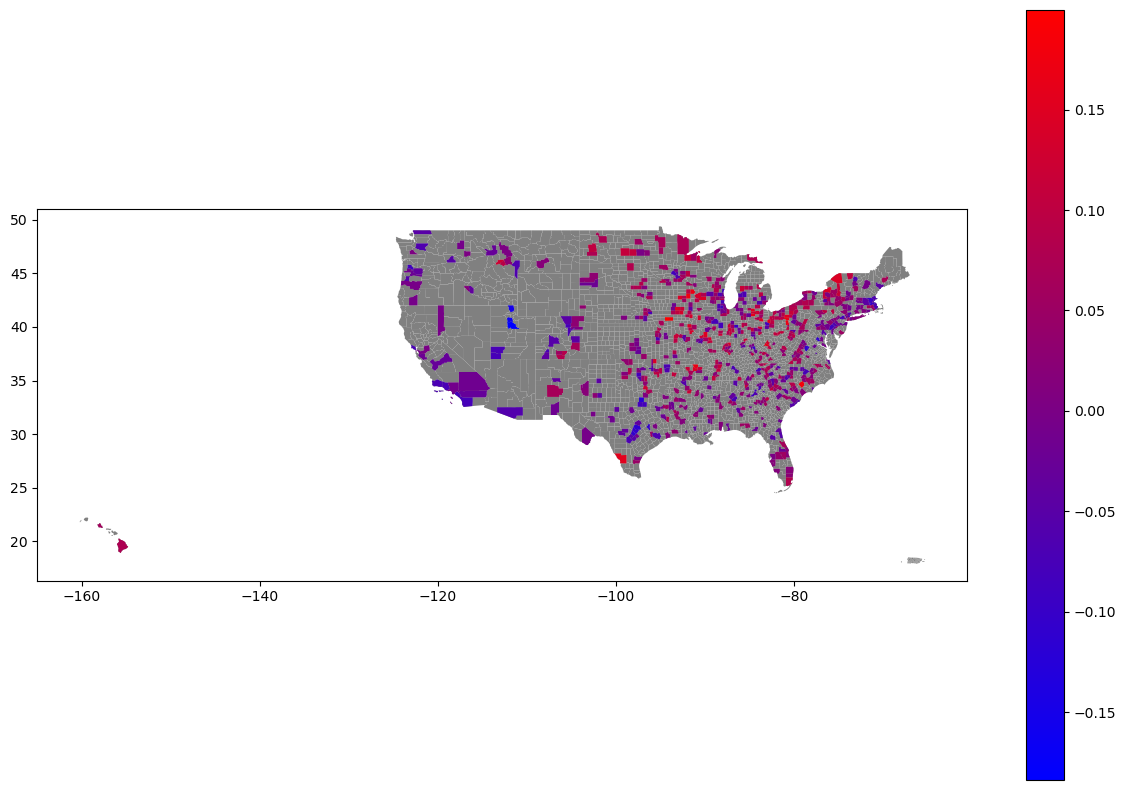

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import geopandas as gpd

# Load the full county shapefile
full_counties = gpd.read_file('https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_2021_us_county_20m.zip')
final_data_modified = merged_data


# Assuming 'fips' is an integer column, first convert it to string
final_data_modified['fips'] = final_data_modified['County'].astype(str)

# Then fill with leading zeros to make each code 5 digits long
final_data_modified['fips'] = final_data_modified['fips'].apply(lambda x: x.zfill(5))
# Merge your data with the geographic data
map_data = full_counties.merge(final_data_modified, left_on='GEOID', right_on='fips')

# Convert both GeoDataFrames to the same CRS
full_counties = full_counties.to_crs(map_data.crs)

final_data_modified.columns
# Aggregate your data (example: using mean)
aggregated_data = final_data_modified.groupby('fips')['Change_in_Republican_Votes_2020'].mean().reset_index()

aggregated_data_sorted = aggregated_data.sort_values(by='Change_in_Republican_Votes_2020', ascending=False)

# Select top entries (e.g., top 5)
top_fips = aggregated_data_sorted.head(10)

# Select bottom entries (e.g., bottom 5)
bottom_fips = aggregated_data_sorted.tail(10)


# Display the top and bottom FIPS codes with their values
print("Top FIPS Codes:\n", top_fips)
print("\nBottom FIPS Codes:\n", bottom_fips)
# Merge the aggregated data with the geographic data
map_data = full_counties.merge(aggregated_data, left_on='GEOID', right_on='fips')

# Exclude Alaska (STATEFP code '02') from both datasets
full_counties = full_counties[full_counties['STATEFP'] != '02']
map_data = map_data[map_data['STATEFP'] != '02']

fig, ax = plt.subplots(1, 1, figsize=(15, 10))


# Plot all counties in grey (excluding Alaska)
full_counties.plot(ax=ax, color='grey')

# Create a custom colormap (red for high, blue for low)
cmap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", ["blue", "red"])

# Plot the aggregated data with the custom colormap (excluding Alaska)
map_data.plot(column='Change_in_Republican_Votes_2020', ax=ax, legend=True, cmap=cmap)

plt.show()

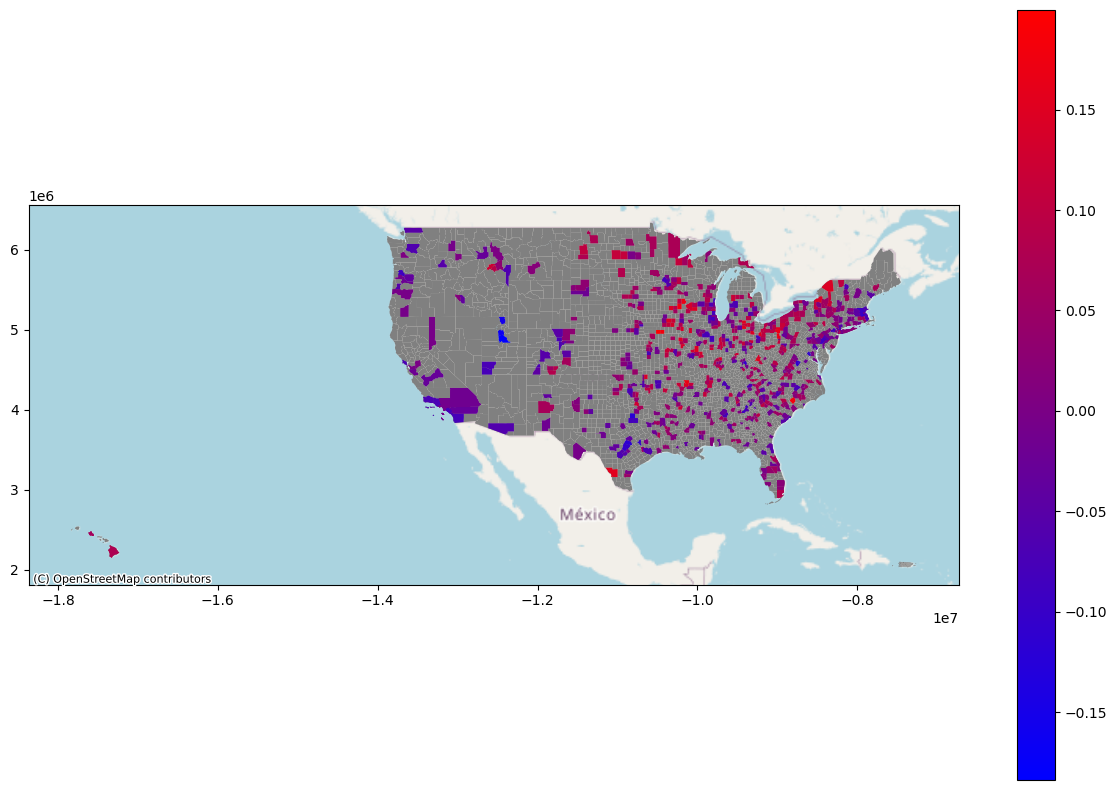

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import geopandas as gpd
import contextily as ctx

# Load the full county shapefile
full_counties = gpd.read_file('https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_2021_us_county_20m.zip')
final_data_modified = merged_data  # Assuming merged_data is already defined

# Preprocess final_data_modified as before
final_data_modified['fips'] = final_data_modified['County'].astype(str).apply(lambda x: x.zfill(5))

# Merge with geographic data
map_data = full_counties.merge(final_data_modified, left_on='GEOID', right_on='fips')

# Convert to the same CRS and exclude Alaska
full_counties = full_counties.to_crs(epsg=3857)  # Web Mercator projection
map_data = map_data.to_crs(epsg=3857)
full_counties = full_counties[full_counties['STATEFP'] != '02']
map_data = map_data[map_data['STATEFP'] != '02']

# Aggregate and sort data as before

# Create the plot
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
full_counties.plot(ax=ax, color='grey')  # Plot all counties in grey

# Create a custom colormap
cmap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", ["blue", "red"])

# Plot the data with the custom colormap
map_data.plot(column='Change_in_Republican_Votes_2020', ax=ax, legend=True, cmap=cmap)

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

plt.show()


In [30]:


fips_to_name = {
    '01': 'AL', '02': 'AK', '04': 'AZ', '05': 'AR', '06': 'CA', 
    '08': 'CO', '09': 'CT', '10': 'DE', '11': 'DC', '12': 'FL', 
    '13': 'GA', '15': 'HI', '16': 'ID', '17': 'IL', '18': 'IN', 
    '19': 'IA', '20': 'KS', '21': 'KY', '22': 'LA', '23': 'ME', 
    '24': 'MD', '25': 'MA', '26': 'MI', '27': 'MN', '28': 'MS', 
    '29': 'MO', '30': 'MT', '31': 'NE', '32': 'NV', '33': 'NH', 
    '34': 'NJ', '35': 'NM', '36': 'NY', '37': 'NC', '38': 'ND', 
    '39': 'OH', '40': 'OK', '41': 'OR', '42': 'PA', '44': 'RI', 
    '45': 'SC', '46': 'SD', '47': 'TN', '48': 'TX', '49': 'UT', 
    '50': 'VT', '51': 'VA', '53': 'WA', '54': 'WV', '55': 'WI', '56': 'WY'
}

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import geopandas as gpd
import contextily as ctx

# Load the full county shapefile
full_counties = gpd.read_file('https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_2021_us_county_20m.zip')
final_data_modified = merged_data  # Assuming merged_data is already defined

# Preprocess final_data_modified as before
final_data_modified['fips'] = final_data_modified['County'].astype(str).apply(lambda x: x.zfill(5))

# Merge with geographic data
map_data = full_counties.merge(final_data_modified, left_on='GEOID', right_on='fips')

# Convert to the same CRS, exclude non-mainland states
full_counties = full_counties.to_crs(epsg=3857)  # Web Mercator projection
map_data = map_data.to_crs(epsg=3857)
exclude_states = ['02', '15', '60', '66', '69', '72', '78']  # Alaska, Hawaii, and territories
full_counties = full_counties[~full_counties['STATEFP'].isin(exclude_states)]
map_data = map_data[~map_data['STATEFP'].isin(exclude_states)]
# Extract the state FIPS code (first two characters of the 'fips' column)
map_data['state_fips'] = map_data['fips'].str[:2]

# Map state FIPS codes to state names using the provided dictionary
map_data['STATE_NAME'] = map_data['state_fips'].map(fips_to_name)

# Now you can use 'STATE_NAME' in your plotting code
# ... (rest of your plotting code)

# Create state boundaries GeoDataFrame
state_boundaries = full_counties.dissolve(by='STATEFP')

import os

# Iterate over each column in the dataset (except 'fips' and 'County' which are not data columns)
for column in final_data_modified.columns.drop(['fips', 'County']):
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))

    # Plot all counties in grey
    full_counties.plot(ax=ax, color='grey')

    # Create a custom colormap based on the column name
    if 'Republican' in column:
        cmap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", ["blue", "red"])
    else:
        cmap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", ["red", "green"])

    # Plot the data with the custom colormap
    map_data.plot(column=column, ax=ax, legend=True, cmap=cmap)

    # Modify legend
    legend = ax.get_legend()
    if legend:
        legend.set_title(f"{column} Scale")

    # Highlight state boundaries
    state_boundaries.boundary.plot(ax=ax, edgecolor='black', linewidth=1)

    # Add basemap
    ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

    # Label states
    for idx, row in state_boundaries.iterrows():
        if idx in fips_to_name:
            x, y = row.geometry.centroid.coords[0]
            ax.text(x, y, fips_to_name[idx], horizontalalignment='center', fontsize=8)

    # Set title and save plot
    plt.title(column)
    plt.savefig(f"/home/yui/Documents/final ma paper graph/{column}.png", bbox_inches='tight')  # Update path as needed
    plt.close(fig)